In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
import seaborn as sns
import scipy.stats as stats

In [3]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
sub_example = pd.read_csv('sample_submission.csv')

In [4]:
train_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [5]:
train_data.shape

(21000, 25)

In [6]:
#checking for data types of all columns
train_data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default_payment_next_month    int64
dtype: object

In [7]:
train_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [8]:
Y_train = train_data['default_payment_next_month']

In [9]:
X_train = train_data.drop('default_payment_next_month',axis=1)

In [10]:
print(Y_train.shape,X_train.shape)

(21000,) (21000, 24)


In [12]:
X_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,4.723258e+04,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,6.953988e+04,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2.686250e+03,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,2.024200e+04,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,6.082675e+04,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


In [16]:
X_train = X_train.drop('ID',axis = 1)
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043
1,240000,2,1,2,46,2,2,-2,-1,0,...,0,2240,1681,2267,0,0,2240,0,2267,3074
2,320000,2,2,1,41,0,0,0,0,0,...,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
4,80000,1,3,1,52,-1,0,0,0,0,...,19385,20561,21261,21457,1500,1500,1500,1028,876,1449


In [20]:
X_train[['SEX','MARRIAGE','EDUCATION']].describe()

,SEX,MARRIAGE,EDUCATION
count,21000.000000,21000.000000,21000.000000
mean,1.607571,1.551714,1.854190
std,0.488303,0.521176,0.791628
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,3.000000,6.000000


In [24]:
X_train.MARRIAGE.value_counts()

2    11184
1     9561
3      219
0       36
Name: MARRIAGE, dtype: int64

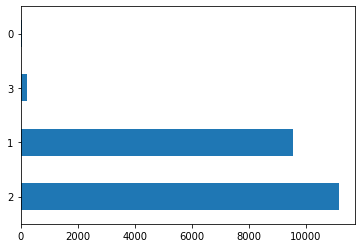

In [29]:
X_train.MARRIAGE.value_counts().plot(kind = 'barh')

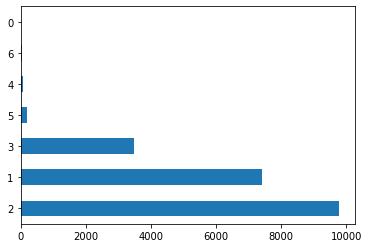

In [30]:
X_train.EDUCATION.value_counts().plot(kind = 'barh')

In [32]:
fil = (X_train.EDUCATION == 5) | (X_train.EDUCATION == 6) | (X_train.EDUCATION == 0)
X_train.loc[fil, 'EDUCATION'] = 4
X_train.EDUCATION.value_counts()

2    9789
1    7415
3    3467
4     329
Name: EDUCATION, dtype: int64

In [66]:
fil = (test_data.EDUCATION == 5) | (test_data.EDUCATION == 6) | (test_data.EDUCATION == 0)
test_data.loc[fil, 'EDUCATION'] = 4
test_data.EDUCATION.value_counts()

2    4241
1    3170
3    1450
4     139
Name: EDUCATION, dtype: int64

In [34]:
X_train.loc[X_train.MARRIAGE == 0, 'MARRIAGE'] = 3
X_train.MARRIAGE.value_counts()

2    11184
1     9561
3      255
Name: MARRIAGE, dtype: int64

In [67]:
test_data.loc[test_data.MARRIAGE == 0, 'MARRIAGE'] = 3
test_data.MARRIAGE.value_counts()

2    4780
1    4098
3     122
Name: MARRIAGE, dtype: int64

In [36]:
X_train = X_train.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})

In [41]:
fil = (X_train.PAY_1 == -2) | (X_train.PAY_1 == -1) | (X_train.PAY_1 == 0)
X_train.loc[fil, 'PAY_1'] = 0
fil = (X_train.PAY_2 == -2) | (X_train.PAY_2 == -1) | (X_train.PAY_2 == 0)
X_train.loc[fil, 'PAY_2'] = 0
fil = (X_train.PAY_3 == -2) | (X_train.PAY_3 == -1) | (X_train.PAY_3 == 0)
X_train.loc[fil, 'PAY_3'] = 0
fil = (X_train.PAY_4 == -2) | (X_train.PAY_4 == -1) | (X_train.PAY_4 == 0)
X_train.loc[fil, 'PAY_4'] = 0
fil = (X_train.PAY_5 == -2) | (X_train.PAY_5 == -1) | (X_train.PAY_5 == 0)
X_train.loc[fil, 'PAY_5'] = 0
fil = (X_train.PAY_6 == -2) | (X_train.PAY_6 == -1) | (X_train.PAY_6 == 0)
X_train.loc[fil, 'PAY_6'] = 0
late = X_train[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [42]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,360000,2,2,2,25,0,0,0,0,0,...,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043
1,240000,2,1,2,46,2,2,0,0,0,...,0,2240,1681,2267,0,0,2240,0,2267,3074
2,320000,2,2,1,41,0,0,0,0,0,...,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500
3,50000,2,2,2,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80000,1,3,1,52,0,0,0,0,0,...,19385,20561,21261,21457,1500,1500,1500,1028,876,1449


In [45]:
X_train[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,21000.000000,21000.000000,21000.000000
mean,1.607571,1.843333,1.556857
std,0.488303,0.745881,0.520640
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,4.000000,3.000000


2    9789
1    7415
3    3467
4     329
Name: EDUCATION, dtype: int64

In [50]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,360000,2,2,2,25,0,0,0,0,0,...,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043
1,240000,2,1,2,46,2,2,0,0,0,...,0,2240,1681,2267,0,0,2240,0,2267,3074
2,320000,2,2,1,41,0,0,0,0,0,...,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500
3,50000,2,2,2,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80000,1,3,1,52,0,0,0,0,0,...,19385,20561,21261,21457,1500,1500,1500,1028,876,1449


In [51]:
test_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [57]:
test_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,60000,2,2,1,30,0,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,200000,2,1,2,29,0,0,0,0,2,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,230000,1,1,2,39,0,0,0,0,-2,...,20650,0,0,0,2500,2000,0,0,0,0
3,150000,1,1,2,40,0,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,140000,1,2,2,27,0,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [70]:
from sklearn.svm import SVC
classifier1 = SVC(kernel="rbf")
X_train,Y_train = X_train.to_numpy(),Y_train.to_numpy()
classifier1.fit(X_train, Y_train )

C:\Users\Shashank Dwivedi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
test_data = test_data.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})

In [64]:
fil = (test_data.PAY_1 == -2) | (test_data.PAY_1 == -1) | (test_data.PAY_1 == 0)
test_data.loc[fil, 'PAY_1'] = 0
fil = (test_data.PAY_2 == -2) | (test_data.PAY_2 == -1) | (test_data.PAY_2 == 0)
test_data.loc[fil, 'PAY_2'] = 0
fil = (test_data.PAY_3 == -2) | (test_data.PAY_3 == -1) | (test_data.PAY_3 == 0)
test_data.loc[fil, 'PAY_3'] = 0
fil = (test_data.PAY_4 == -2) | (test_data.PAY_4 == -1) | (test_data.PAY_4 == 0)
test_data.loc[fil, 'PAY_4'] = 0
fil = (test_data.PAY_5 == -2) | (test_data.PAY_5 == -1) | (test_data.PAY_5 == 0)
test_data.loc[fil, 'PAY_5'] = 0
fil = (test_data.PAY_6 == -2) | (test_data.PAY_6 == -1) | (test_data.PAY_6 == 0)
test_data.loc[fil, 'PAY_6'] = 0
late = test_data[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [65]:
test_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,60000,2,2,1,30,0,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,200000,2,1,2,29,0,0,0,0,2,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,230000,1,1,2,39,0,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,150000,1,1,2,40,0,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,140000,1,2,2,27,0,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [69]:
test_x = test_data
tes
pred = classifier1.predict(test_x)

submission = pd.read_csv('sample_submission.csv')
submission['default_payment_next_month']  = pred
submission['default_payment_next_month'].value_counts()
submission.to_csv('to_mit.csv')

from sklearn.metrics import accuracy_score
train_pred = classifier1.predict(X_train)
skore = accuracy_score(X_train, train_pred)
print(skore)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets